In [1]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 102.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 35.3 MB/s eta 0:00:00


In [2]:
!pip install --upgrade googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 8.0 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=bad819c2203242829e21be7ee937c7aa32964742e1edb2a6e5f01391ff4032c2
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling 

In [3]:
!pip install googletrans

In [4]:
!pip install gtts

In [6]:
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
processor = BlipProcessor.from_pretrained("noamrot/FuseCap")
model = BlipForConditionalGeneration.from_pretrained("noamrot/FuseCap").to(device)

In [7]:
# Define the image source, either a local file path or a URL
img_source = '/content/drive/MyDrive/Kaggle API/download.jpg'  # Modify with your image source

# Check if img_source is a URL or a local file path
if img_source.startswith(('http://', 'https://')):
    # It's a URL, download the image
    raw_image = Image.open(requests.get(img_source, stream=True).raw).convert('RGB')
else:
    # It's a local file path, open the image directly
    raw_image = Image.open(img_source).convert('RGB')

the picture depicts a young girl with long brown hair wearing an orange shirt paints a picture on a white wall, while holding a green leaf in her white hand





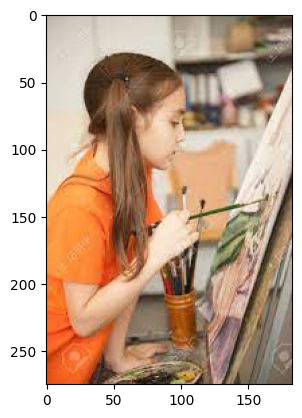

In [11]:
import matplotlib.pyplot as plt

image = Image.open(img_source)
plt.imshow(image)

text = "The picture depicts "
inputs = processor(raw_image, text, return_tensors="pt").to(device)

out = model.generate(**inputs, num_beams=3)
print(processor.decode(out[0], skip_special_tokens=True))
print('\n\n')

In [12]:
text = processor.decode(out[0], skip_special_tokens=True)

In [13]:
from gtts import gTTS #Import Google Text to Speech
from IPython.display import Audio #Import Audio method from IPython's Display Class
tts = gTTS(text) #Provide the string to convert to speech
tts.save('1.wav') #save the string converted to speech as a .wav file
sound_file = '1.wav'
Audio(sound_file, autoplay=True)

#Autoplay = True will play the sound automatically
#If you would not like to play the sound automatically, simply pass Autoplay = False.

In [20]:
from googletrans import Translator, LANGUAGES

def translate_to_hindi(text):
    # Create a Translator object
    translator = Translator()

    # Translate the text from English to Hindi
    translation = translator.translate(text, src='en', dest='hi')

    # Return the translated text
    return translation.text

if __name__ == "__main__":
    # Input text in English
    input_text = text

    # Translate to Hindi
    translated_text = translate_to_hindi(input_text)

    # Print the translated text
    print(f"English: {input_text}")
    print('\n')
    print(f"Hindi: {translated_text}")

English: the picture depicts a young girl with long brown hair wearing an orange shirt paints a picture on a white wall, while holding a green leaf in her white hand


Hindi: तस्वीर में एक युवा लड़की को दिखाया गया है जिसमें लंबे भूरे बालों के साथ एक नारंगी शर्ट पहने हुए एक सफेद दीवार पर एक तस्वीर पेंट करती है, जबकि उसके सफेद हाथ में एक हरी पत्ती पकड़े हुए


In [21]:
from gtts import gTTS
from googletrans import Translator
from IPython.display import Audio

def translate_and_tts(text, target_language='hi'):
    # Initialize the Translator
    translator = Translator()

    # Translate the text to Hindi
    translation = translator.translate(text, dest=target_language)

    # Create a gTTS object for the translated text
    tts = gTTS(text=translation.text, lang=target_language)

    # Save the TTS audio to a file
    tts.save("translated_audio.mp3")

    # Play the audio using the IPython Audio widget
    return Audio("translated_audio.mp3", autoplay=True)

translate_and_tts(input_text)